In [50]:
import pandas as pd
import numpy as np
import sklearn
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Conjunto de datos

In [51]:
#Dataset with data since 1996
df_train = pd.read_csv('../DataStats.NBA/RegularSeason/RegularTotal.csv')

#Dataset with 2020 data
df_2020 = pd.read_csv('../DataStats.NBA/RegularSeason/RegularTotal_2020.csv')
df_train[df_train['MVP'] ==1]

,Year,Avg. Pace,PLAYER,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,...,OFFRTG,DEFRTG,DEFWS,eFG%,TS%,USG%,PIE,MVP,Prior MVPs,DPOY
1,1996,90.1,Karl Malone,UTA,1,82,82,64,27.4,9.9,...,115.0,101.3,0.140,55.0,60.0,32.1,21.2,1,0,0
441,1997,90.3,Michael Jordan,CHI,1,82,82,62,28.7,5.8,...,108.0,98.3,163.000,47.3,53.3,33.3,17.5,1,4,0
882,1998,88.9,Karl Malone,UTA,1,49,50,36,23.8,9.4,...,107.3,97.0,0.140,49.3,57.7,30.3,19.6,1,1,0
1320,1999,93.1,Shaquille O'Neal,LAL,1,79,82,66,29.7,13.6,...,107.7,96.2,0.181,57.4,57.8,31.1,21.4,1,0,0
1759,2000,91.3,Allen Iverson,PHI,1,71,82,50,31.1,3.8,...,102.6,96.5,179.000,44.7,51.8,34.9,15.5,1,0,0
2204,2001,90.7,Tim Duncan,SAS,2,82,82,58,25.5,12.7,...,105.9,96.7,188.000,50.8,57.6,28.9,20.7,1,0,0
2646,2002,91.0,Tim Duncan,SAS,1,81,82,60,23.3,12.9,...,105.6,96.4,0.173,51.5,56.4,27.6,20.6,1,1,0
3071,2003,90.1,Kevin Garnett,MIN,1,82,82,58,24.2,13.9,...,106.3,96.7,163.000,50.2,54.7,29.1,22.2,1,0,0
3570,2004,90.9,Steve Nash,PHX,1,75,82,60,15.5,3.3,...,118.6,105.7,77.000,55.7,60.6,20.1,14.5,1,0,0
4006,2005,90.5,Steve Nash,PHX,3,79,82,54,18.8,4.2,...,112.3,104.1,0.101,58.3,63.2,22.7,16.6,1,1,0


## TRANSFORMACIÓN DE LOS DATOS

In [52]:
#TRANSFORM DATA
for df in [df_train, df_2020]:
    #Percentage of GP out of Team GP
    df['GP%'] = (df['GP'] / df['Team GP'])  
    df['W%'] = (df['W'] / df['Team GP']) 

    #Delete players with less tha 33% of games played.
    df.drop(df[df['GP%'] < 0.33].index, inplace=True)

    #Transform the data in function of the Avg. Pace
    for stat in ['PTS','REB','AST','STL','BLK', 'TOV', '3PM']: 
        df['Transformed ' + stat] = df[stat] / df['Avg. Pace']

## GRAFICAS DE RELACIÓN ENTRE LAS VARIABLES

C:\Users\jcorr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


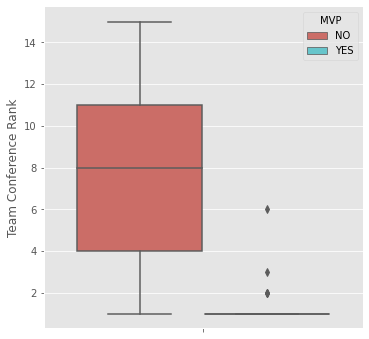

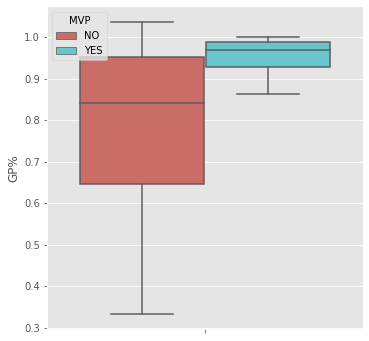

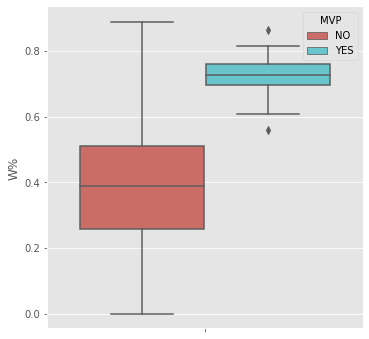

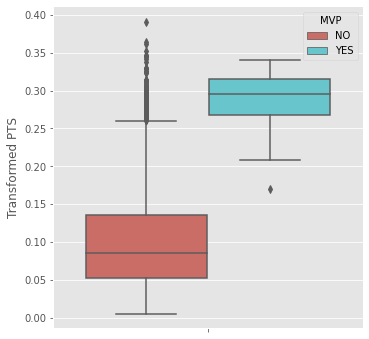

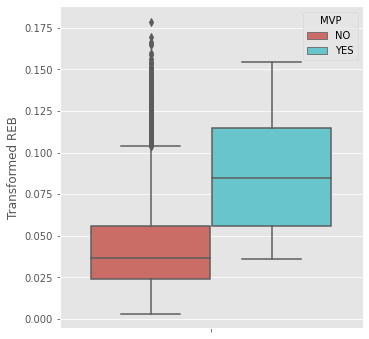

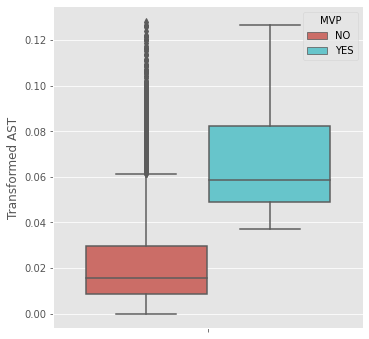

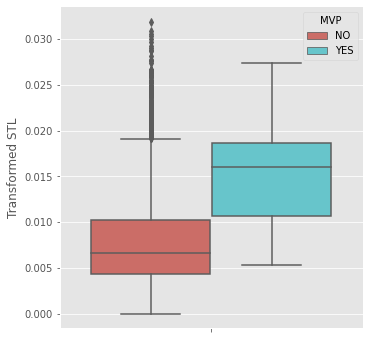

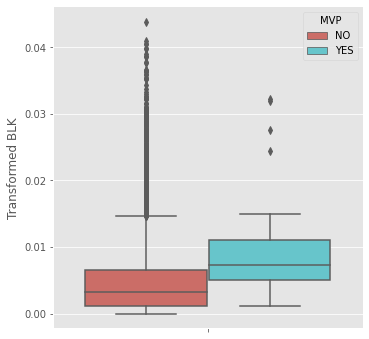

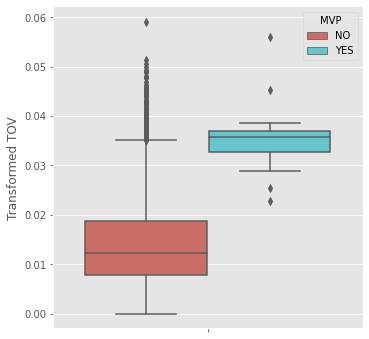

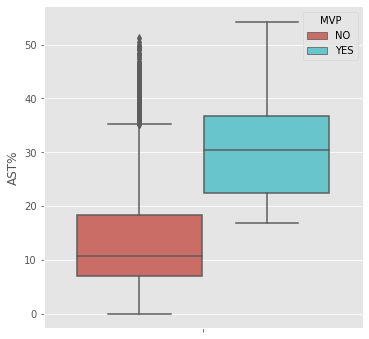

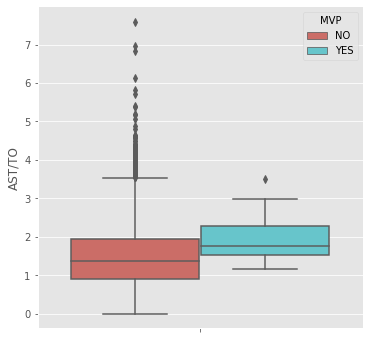

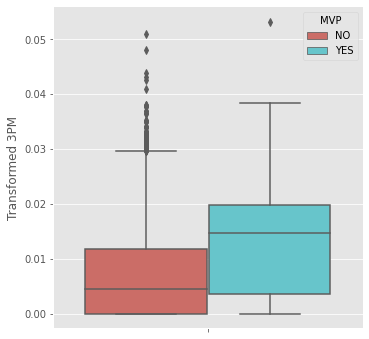

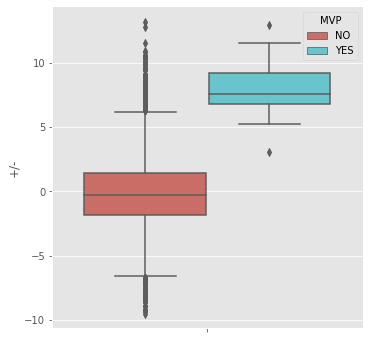

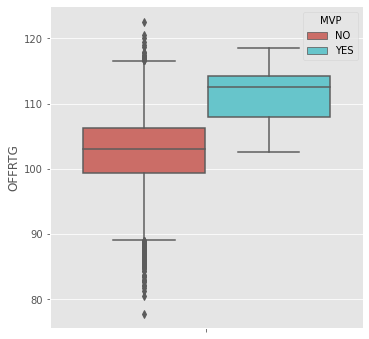

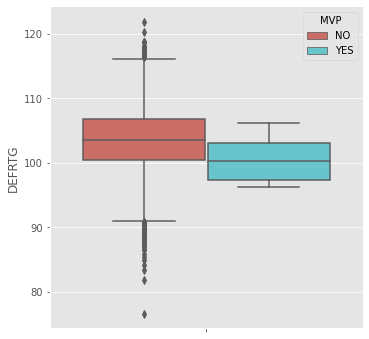

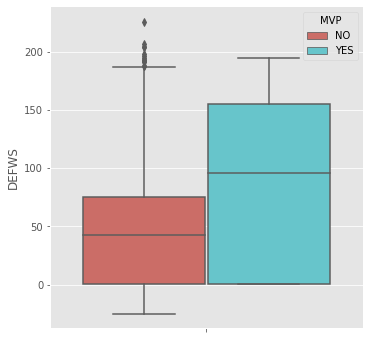

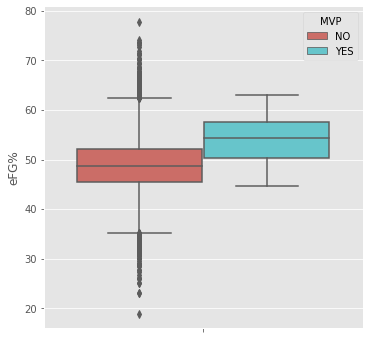

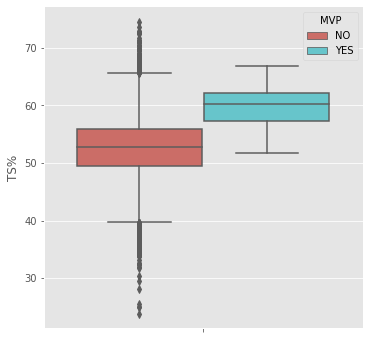

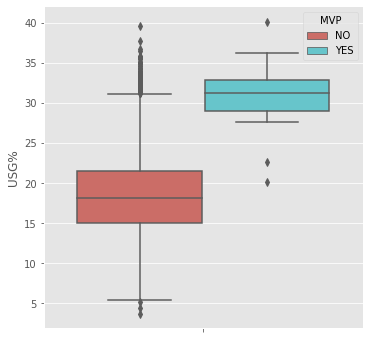

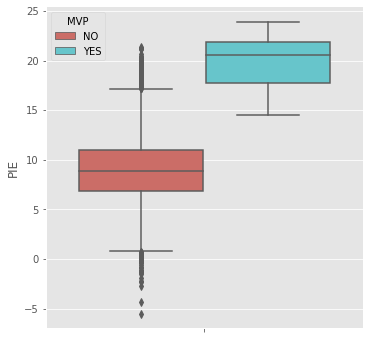

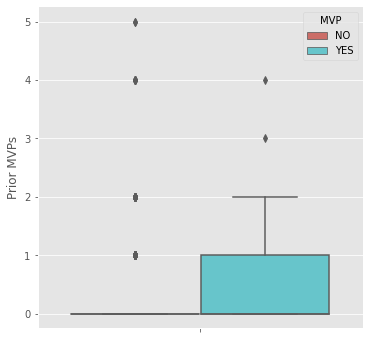

In [53]:
palette = sns.color_palette("hls", 2)
plt.style.use("ggplot")
# # fig = plt.figure(figsize=(20,16))
variables = ['Team Conference Rank','GP%','W%','Transformed PTS','Transformed REB','Transformed AST','Transformed STL','Transformed BLK','Transformed TOV','AST%','AST/TO','Transformed 3PM','+/-','OFFRTG','DEFRTG','DEFWS','eFG%','TS%','USG%','PIE','Prior MVPs']
df_train['Grafica'] = 0
for var in variables:
    # g = sns.catplot(data=df_train, y=var, x='Grafica', hue='All-Star', kind="violin", split=True, palette=palette, legend_out=False).set(xticklabels=[]).set(xlabel=None)
    # legend = g._legend
    # for g, l in zip(legend.texts,("NO", "YES")):
    #     g.set_text(l)

    g = sns.catplot(data=df_train, y=var, x='Grafica' , hue='MVP', kind="box", palette=palette, legend_out=False).set(xticklabels=[]).set(xlabel=None)
    legend = g._legend
    for t, l in zip(legend.texts,("NO", "YES")):
        t.set_text(l)

    # g = sns.catplot(data=df_train, y=var, x='Grafica' , hue='All-Star', kind="boxen", palette=palette, legend_out=False).set(xticklabels=[]).set(xlabel=None)
    # legend = g._legend
    # for t, l in zip(legend.texts,("NO", "YES")):
    #     t.set_text(l)

# Creación del modelo

In [54]:
# variables_selec = ['Team Conference Rank','GP%','W%','Transformed PTS','Transformed REB','Transformed AST','Transformed STL','Transformed BLK','Transformed TOV', 'TS%', 'DEFWS','USG%','PIE','Prior MVPs']
variables_selec = ['Team Conference Rank','GP%','W%','Transformed PTS','Transformed REB','Transformed AST','Transformed STL','Transformed BLK','Transformed TOV','AST%','+/-','OFFRTG','DEFWS','eFG%','TS%','USG%','PIE','Prior MVPs']
df_trainSelected = df_train[variables_selec + ['MVP']]
df_2020Selected = df_2020[variables_selec]
df_trainSelected[df_trainSelected['MVP'] ==1]

,Team Conference Rank,GP%,W%,Transformed PTS,Transformed REB,Transformed AST,Transformed STL,Transformed BLK,Transformed TOV,AST%,+/-,OFFRTG,DEFWS,eFG%,TS%,USG%,PIE,Prior MVPs,MVP
1,1,1.000000,0.780488,0.304107,0.109878,0.049945,0.015538,0.006659,0.031077,23.4,9.4,115.0,0.140,55.0,60.0,32.1,21.2,0,1
441,1,1.000000,0.756098,0.317829,0.064230,0.038760,0.018826,0.005537,0.025471,17.4,7.3,108.0,163.000,47.3,53.3,33.3,17.5,4,1
882,1,0.980000,0.720000,0.267717,0.105737,0.046119,0.014623,0.006749,0.037120,22.1,7.2,107.3,0.140,49.3,57.7,30.3,19.6,1,1
1320,1,0.963415,0.804878,0.319012,0.146079,0.040816,0.005371,0.032223,0.030075,18.4,8.9,107.7,0.181,57.4,57.8,31.1,21.4,0,1
1759,1,0.865854,0.609756,0.340635,0.041621,0.050383,0.027382,0.003286,0.036145,22.6,5.2,102.6,179.000,44.7,51.8,34.9,15.5,0,1
2204,2,1.000000,0.707317,0.281147,0.140022,0.040794,0.007718,0.027563,0.035281,18.2,6.8,105.9,188.000,50.8,57.6,28.9,20.7,0,1
2646,1,0.987805,0.731707,0.256044,0.141758,0.042857,0.007692,0.031868,0.034066,19.1,6.8,105.6,0.173,51.5,56.4,27.6,20.6,1,1
3071,1,1.000000,0.707317,0.268590,0.154273,0.055494,0.016648,0.024417,0.028857,23.3,7.5,106.3,163.000,50.2,54.7,29.1,22.2,0,1
3570,1,0.914634,0.731707,0.170517,0.036304,0.126513,0.011001,0.001100,0.036304,46.0,8.9,118.6,77.000,55.7,60.6,20.1,14.5,0,1
4006,3,0.963415,0.658537,0.207735,0.046409,0.116022,0.008840,0.002210,0.038674,43.5,6.0,112.3,0.101,58.3,63.2,22.7,16.6,1,1


In [55]:
X = df_trainSelected.loc[:,'Team Conference Rank':'Prior MVPs']
Y = df_trainSelected.loc[:,'MVP']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
from sklearn.preprocessing import MinMaxScaler, Normalizer
minMaxScaler = MinMaxScaler()
normalizer = Normalizer()

In [57]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

randomForestClassifier = RandomForestClassifier()
adaBoostClassifier = AdaBoostClassifier()
baggingClassifier = BaggingClassifier() 
extraTreesClassifier = ExtraTreesClassifier()
gradientBoostingClassifier = GradientBoostingClassifier()

In [58]:
from sklearn.pipeline import Pipeline
steps = [('scaler', minMaxScaler), ('modelo', randomForestClassifier)]
mypipeline = Pipeline(steps=steps)
from sklearn.model_selection import GridSearchCV
param_grid = [                 

                {'modelo':[randomForestClassifier],                 
                'scaler':[minMaxScaler, normalizer],
                'modelo__criterion':['gini', 'entropy'],
                'modelo__bootstrap':[True, False],
                'modelo__warm_start':[True, False]
                }, 
                     
                {'modelo':[extraTreesClassifier],                 
                'scaler':[minMaxScaler, normalizer], 
                'modelo__criterion':['gini', 'entropy']},

                ]
                
gs = GridSearchCV(mypipeline, param_grid=param_grid, n_jobs=-1, refit=True, cv=10)
gs.fit(X_train,Y_train)
Y_test_pred = gs.predict(X_test)
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
confusion_matrix(Y_test, Y_test_pred)

array([[2917,    1],
       [   4,    4]], dtype=int64)

In [59]:
miMejorModeloParams = gs.best_params_
miMejorModeloParams

{'modelo': RandomForestClassifier(bootstrap=False, warm_start=True),
 'modelo__bootstrap': False,
 'modelo__criterion': 'gini',
 'modelo__warm_start': True,
 'scaler': MinMaxScaler()}

In [60]:
miMejorModelo = gs.best_estimator_
miMejorModeloScore = gs.best_score_
miMejorModeloScore

0.9984845645891177

In [61]:
metricas = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
puntuacion = [accuracy_score(Y_test, Y_test_pred), precision_score(Y_test, Y_test_pred), 
                f1_score(Y_test, Y_test_pred), recall_score(Y_test, Y_test_pred)]
list_of_tuples = list(zip(metricas, puntuacion))
df_clasificadores = pd.DataFrame(list_of_tuples, columns = ['Métrica', 'Puntuación'])
df_clasificadores.set_index('Métrica')

,Puntuación
Métrica,
Accuracy,0.998291
Precision,0.800000
F1 Score,0.615385
Recall,0.500000


In [62]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": miMejorModelo.steps[1][1].feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
16,PIE,0.266586
2,W%,0.088902
3,Transformed PTS,0.086780
10,+/-,0.070119
15,USG%,0.068684
8,Transformed TOV,0.064566
9,AST%,0.054210
11,OFFRTG,0.038200
12,DEFWS,0.036790
5,Transformed AST,0.034557


In [63]:
predict = miMejorModelo.predict(df_2020Selected)
predict_proba = miMejorModelo.predict_proba(df_2020Selected)

In [64]:
df_info = df_2020[['PLAYER', 'TEAM']]
df_info.reset_index(drop=True, inplace=True)
df_info['PROBABILITY'] = predict_proba[:, 1]

<ipython-input-64-2ef91cb9dba0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['PROBABILITY'] = predict_proba[:, 1]


In [65]:
df_info[df_info['PROBABILITY'] >0].sort_values(by=['PROBABILITY'], ascending=False)

,PLAYER,TEAM,PROBABILITY
0,Stephen Curry,GSW,0.15
4,Giannis Antetokounmpo,MIL,0.15
3,Joel Embiid,PHI,0.14
16,LeBron James,LAL,0.08
12,Nikola Jokic,DEN,0.07
1,Bradley Beal,WAS,0.06
91,Rudy Gobert,UTA,0.05
5,Luka Doncic,DAL,0.03
8,Kevin Durant,BKN,0.03
72,Mike Conley,UTA,0.03
